In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams.update({'font.size': 15})  #set font size of figures

# Model 1

In [2]:
# Model1 defines the Equations Of Motion (hereafter: EoM) for a potential V(x) = (1/2)kx^2(1-(2/3)ax). For such a potential
# and no external forces (F_ext(x,t)=0), the EoM is given by Newton's second law (remember F_k(x) = -dV/dx)

# EoM  :  mx''= -kx(1-ax)
# When ax<<1  : Harmonic Motion
# When x⟶1/a : Anharmonic Motion 


t = np.linspace(0, 20, 201)   #Time

m=1   # keeping k=m=1 for simplicity
k=1
a=0.00005

#To solve the EoM, we need to convert the EoM to a system of first order Diffrential Equations, i.e. introduce y=x'
def model1(z,t,m,k,a):  
    # z: containts the initial conditions [x(0), x'(0)]
    # t: the time coordinate
    # m, k : mass and spring constant respectively
    # a : perturbation parameter that introduces non-linearity
    
    x, y = z            
    dzdt = [y, -(k/m)*x*(1-a*x)]  #System of first order differential equations [y, y'] Where y=x'
    return dzdt


y0=[1.8,0]   #Initial conditions [x(0), x'(0)]


#Solves the system by integrating y(t) and y'(t) to obtain x(t) and x'(t) (since y(t)=x'(t)). 
#Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html -> check the bottom of this
#page for an example
sol = odeint(model1, y0, t, args=(m,k,a))

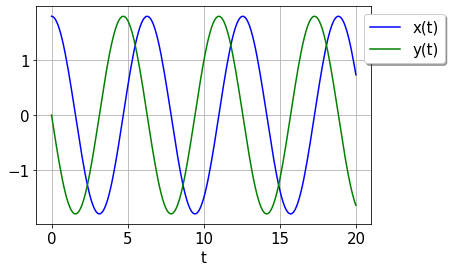

In [3]:
# Plots of x(t) and x'(t)

plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label="y(t)")
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1),  shadow=True, ncol=1)
plt.xlabel('t')
plt.grid()
plt.show()

In [4]:
## Sample code to demonstrate that nonharmonic oscillators are nonisochronous, that is, vibrations
## with different amplitudes have different periods (note that the default parameters do NOT display the desired effect)

Amplitudes = [0.5,1.25,1.85,1.95]   #Different Initial conditions for x(0)

x = np.zeros((len(t),len(Amplitudes)))   #Create arrays to store results for x(t) & x'(t) for all the different amplitudes
xdot = np.zeros((len(t),len(Amplitudes)))



for i in range(len(Amplitudes)):                     #Solves EoM for all the different amplitudes
    y0=[Amplitudes[i],0]                             # initial conditions [x(0), x'(0)]
    sol = odeint(model1, y0, t, args=(m,k,a))
    x[:,i] = sol[:,0]
    xdot[:,i] = sol[:,1]
    

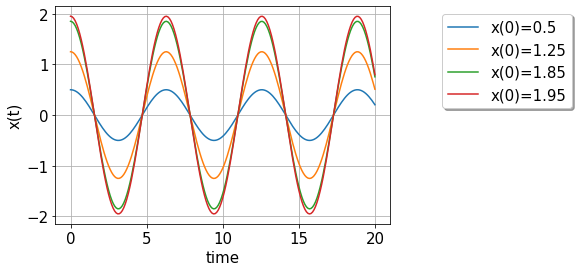

In [5]:
# Plots x(t) for the different initial conditions 

for i in range(len(Amplitudes)):
    plt.plot(t, x[:, i], label='x(0)={}'.format(Amplitudes[i]))
    plt.xlabel('time')
    plt.ylabel('x(t)')
    
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1),  shadow=True, ncol=1)
plt.grid()
plt.show()

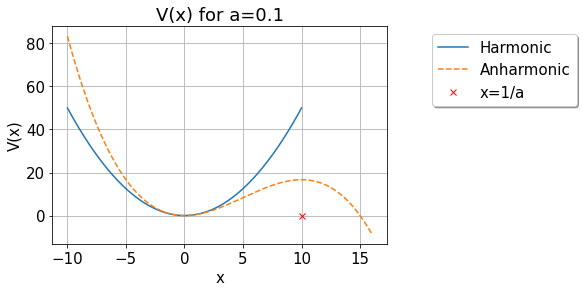

In [6]:
#plots the potentials for harmonic motion, V(x) = (1/2)kx^2, and anharmonic motion V(x) = (1/2)kx^2(1-(2/3)ax) for a=0.1

a = 0.1

X = np.linspace(-10,10,500)
X1 = np.linspace(-10,16,1500)

harmonicPotential = (1/2)*k*X**2
AnharmonicPotential =((1/2)*k*X1**2)*(1-(2/3)*a*X1)
    
    
plt.plot(X,harmonicPotential, label='Harmonic')
plt.plot(X1,AnharmonicPotential, label='Anharmonic', ls='--')
plt.plot(1/a,0,'rx',label='x=1/a')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1),  shadow=True, ncol=1)
plt.title("V(x) for a=0.1")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid()
plt.show()



# Model 2